In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split , KFold
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

from collections import Counter

In [ ]:
# import iris dataset
iris = datasets.load_iris()
# np.c_ is the numpy concatenate function
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                      columns= iris['feature_names'] + ['target'])
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [ ]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
x= iris_df.iloc[:, :-1]
y= iris_df.iloc[:, -1]

In [ ]:
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

In [ ]:
# split the data into train and test sets
x_train, x_test, y_train, y_test= train_test_split(x, y,
                                                   test_size= 0.4,
                                                   shuffle= True, #shuffle the data to avoid bias
                                                   random_state= 0)
x_train= np.asarray(x_train)
y_train= np.asarray(y_train)

x_test= np.asarray(x_test)
y_test= np.asarray(y_test)



In [ ]:
print(f'training set size: {x_train.shape[0]} samples \ntest set size: {x_test.shape[0]} samples')

training set size: 90 samples 
test set size: 60 samples


In [ ]:
scaler= Normalizer().fit(x_train) # the scaler is fitted to the training set
normalized_x_train= scaler.transform(x_train) # the scaler is applied to the training set
normalized_x_test= scaler.transform(x_test) # the scaler is applied to the test set

In [ ]:
print('x train before Normalization')
print(x_train[0:5])
print('\nx train after Normalization')
print(normalized_x_train[0:5])


x train before Normalization
[[6.  3.4 4.5 1.6]
 [4.8 3.1 1.6 0.2]
 [5.8 2.7 5.1 1.9]
 [5.6 2.7 4.2 1.3]
 [5.6 2.9 3.6 1.3]]

x train after Normalization
[[0.71524936 0.40530797 0.53643702 0.19073316]
 [0.80846584 0.52213419 0.26948861 0.03368608]
 [0.69052512 0.32145135 0.60718588 0.22620651]
 [0.73544284 0.35458851 0.55158213 0.1707278 ]
 [0.75911707 0.3931142  0.48800383 0.17622361]]


Text(0.5, 1.08, 'Pair Plot of the dataset After normalization')

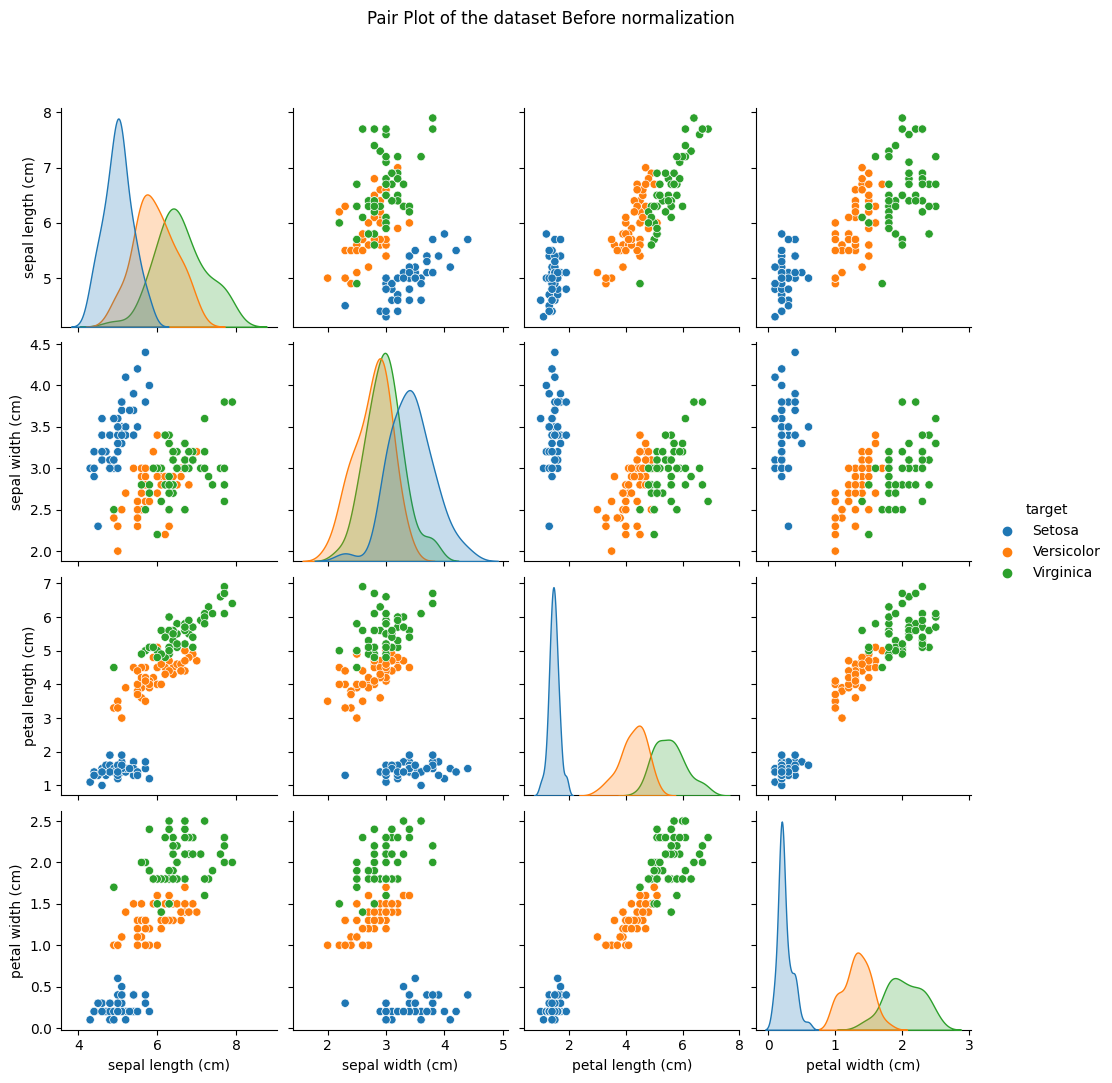

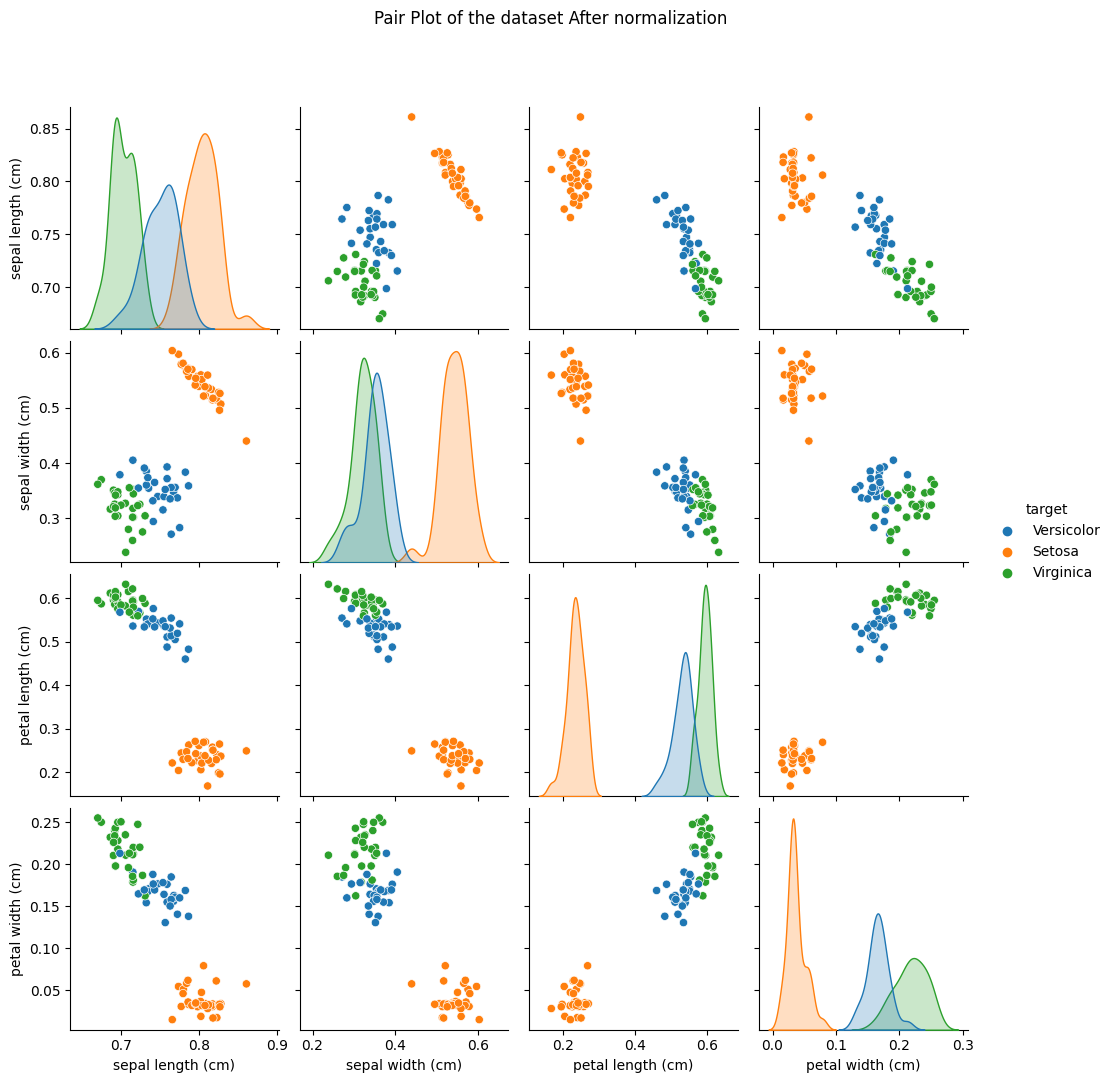

In [ ]:
## Before
# View the relationships between variables; color code by species type
di= {0.0: 'Setosa', 1.0: 'Versicolor', 2.0:'Virginica'} # dictionary

before= sns.pairplot(iris_df.replace({'target': di}), hue= 'target')
before.fig.suptitle('Pair Plot of the dataset Before normalization', y=1.08)

## After
iris_df_2= pd.DataFrame(data= np.c_[normalized_x_train, y_train],
                        columns= iris['feature_names'] + ['target'])
di= {0.0: 'Setosa', 1.0: 'Versicolor', 2.0: 'Virginica'}
after= sns.pairplot(iris_df_2.replace({'target':di}), hue= 'target')
after.fig.suptitle('Pair Plot of the dataset After normalization', y=1.08)


In [ ]:
def distance_ecu(x_train, x_test_point):
  """
  Input:
    - x_train: corresponding to the training data
    - x_test_point: corresponding to the test point

  Output:
    -distances: The distances between the test point and each point in the training data.

  """
  distances= []  ## create empty list called distances
  for row in range(len(x_train)): ## Loop over the rows of x_train
      current_train_point= x_train[row] #Get them point by point
      current_distance= 0 ## initialize the distance by zero

      for col in range(len(current_train_point)): ## Loop over the columns of the row

          current_distance += (current_train_point[col] - x_test_point[col]) **2
          ## Or current_distance = current_distance + (x_train[i] - x_test_point[i])**2
      current_distance= np.sqrt(current_distance)

      distances.append(current_distance) ## Append the distances

  # Store distances in a dataframe
  distances= pd.DataFrame(data=distances,columns=['dist'])
  return distances


In [ ]:
def nearest_neighbors(distance_point, K):
    """
    Input:
        -distance_point: the distances between the test point and each point in the training data.
        -K             : the number of neighbors

    Output:
        -df_nearest: the nearest K neighbors between the test point and the training data.

    """

    # Sort values using the sort_values function
    df_nearest= distance_point.sort_values(by=['dist'], axis=0)

    ## Take only the first K neighbors
    df_nearest= df_nearest[:K]
    return df_nearest

In [ ]:
def voting(df_nearest, y_train):
    """
    Input:
        -df_nearest: dataframe contains the nearest K neighbors between the full training dataset and the test point.
        -y_train: the labels of the training dataset.

    Output:
        -y_pred: the prediction based on Majority Voting

    """

    ## Use the Counter Object to get the labels with K nearest neighbors.
    counter_vote= Counter(y_train[df_nearest.index])

    y_pred= counter_vote.most_common()[0][0]   # Majority Voting

    return y_pred

In [ ]:
def KNN_from_scratch(x_train, y_train, x_test, K):

    """
    Input:
    -x_train: the full training dataset
    -y_train: the labels of the training dataset
    -x_test: the full test dataset
    -K: the number of neighbors

    Output:
    -y_pred: the prediction for the whole test set based on Majority Voting.

    """

    y_pred=[]

    ## Loop over all the test set and perform the three steps
    for x_test_point in x_test:
      distance_point  = distance_ecu(x_train, x_test_point)  ## Step 1
      df_nearest_point= nearest_neighbors(distance_point, K)  ## Step 2
      y_pred_point    = voting(df_nearest_point, y_train) ## Step 3
      y_pred.append(y_pred_point)

    return y_pred


In [ ]:
K=3
y_pred_scratch= KNN_from_scratch(normalized_x_train, y_train, normalized_x_test, K)
print(y_pred_scratch)

[2.0, 1.0, 0.0, 2.0, 0.0, 2.0, 0.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 2.0, 1.0, 0.0, 0.0, 2.0, 0.0, 0.0, 1.0, 1.0, 0.0, 2.0, 2.0, 0.0, 2.0, 2.0, 1.0, 0.0, 2.0, 1.0, 1.0, 2.0, 0.0, 2.0, 0.0, 0.0, 1.0, 2.0, 2.0, 2.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 1.0, 2.0]


In [ ]:
knn=KNeighborsClassifier(K)
knn.fit(normalized_x_train, y_train)
y_pred_sklearn= knn.predict(normalized_x_test)
print(y_pred_sklearn)

[2. 1. 0. 2. 0. 2. 0. 1. 1. 1. 2. 1. 1. 1. 1. 0. 1. 1. 0. 0. 2. 1. 0. 0.
 2. 0. 0. 1. 1. 0. 2. 2. 0. 2. 2. 1. 0. 2. 1. 1. 2. 0. 2. 0. 0. 1. 2. 2.
 2. 2. 1. 2. 1. 1. 2. 2. 2. 2. 1. 2.]


In [ ]:
print(np.array_equal(y_pred_sklearn, y_pred_scratch))

True


In [ ]:
print(f'The accuracy of our implementation is {accuracy_score(y_test, y_pred_scratch)}')
print(f'The accuracy of sklearn implementation is {accuracy_score(y_test, y_pred_sklearn)}')

The accuracy of our implementation is 0.9666666666666667
The accuracy of sklearn implementation is 0.9666666666666667


In [ ]:
n_splits= 4 ## Choose the number of splits
kf= KFold(n_splits= n_splits) ## Call the K Fold function

accuracy_k= [] ## Keep track of the accuracy for each K
k_values= list(range(1,30,2)) ## Search for the best value of K

for k in k_values: ## Loop over the K values
  accuracy_fold= 0
  for normalized_x_train_fold_idx, normalized_x_valid_fold_idx in  kf.split(normalized_x_train): ## Loop over the splits
      normalized_x_train_fold= normalized_x_train[normalized_x_train_fold_idx] ## fetch the values
      y_train_fold= y_train[normalized_x_train_fold_idx]

      normalized_x_test_fold= normalized_x_train[normalized_x_valid_fold_idx]
      y_valid_fold= y_train[normalized_x_valid_fold_idx]
      y_pred_fold= KNN_from_scratch(normalized_x_train_fold, y_train_fold, normalized_x_test_fold, k)

      accuracy_fold+= accuracy_score (y_pred_fold, y_valid_fold) ## Accumulate the accuracy
  accuracy_fold= accuracy_fold/ n_splits ## Divide by the number of splits
  accuracy_k.append(accuracy_fold)


In [ ]:
print(f'The accuracy for each K value was {list ( zip (accuracy_k, k_values))}') ## creates a tuple with accuracy corresponding to k value

The accuracy for each K value was [(0.9664031620553359, 1), (0.9772727272727273, 3), (0.9659090909090909, 5), (0.9772727272727273, 7), (0.9772727272727273, 9), (0.9664031620553359, 11), (0.9772727272727273, 13), (0.9664031620553359, 15), (0.9664031620553359, 17), (0.9664031620553359, 19), (0.9772727272727273, 21), (0.9664031620553359, 23), (0.9664031620553359, 25), (0.9555335968379447, 27), (0.9446640316205533, 29)]


In [ ]:
print(f'Best accuracy was {np.max(accuracy_k)}, which corresponds to a value of K= {k_values[np.argmax(accuracy_k)]}')

Best accuracy was 0.9772727272727273, which corresponds to a value of K= 3
